In [1]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

### Antes de ejecutar este documento, se debe crear la base de datos con el script que se encuentra en el repositorio (ubank_db.sql)
#### Ingresar las credenciales de su entorno local

In [2]:
engine = create_engine("mysql+pymysql://<user>:<password>@localhost:<puerto>/<DB>")

In [3]:
catalog_df = pd.read_csv("./data/catalog.csv")
projects_df = pd.read_csv("./data/test_projects.csv")
rules_df = pd.read_csv("./data/test_rules.csv")
transactions_df = pd.read_csv("./data/test_transactions.csv")

In [4]:
categories = catalog_df[catalog_df["type"] == "project_categories"]
rule_types = catalog_df[catalog_df["type"] == "rule_types"]

In [5]:
categories

,id,name,type
0,015981e401af4887becbec5f45c3cd4c,Vehiculo,project_categories
1,4500593565e942d9876fa73734336157,Solo ahorrar,project_categories
2,6f3c645d720140d0be6063b26b1c423d,Otro,project_categories
3,b252b4300a02483eb15812ff9e03b841,Comprar algo,project_categories
4,c173854d8d994c5cad7926cedb6b8770,Viajar,project_categories
5,edd09901ae364ddb80347e40005d2244,Hogar,project_categories
6,ff8ac02124d847bd8a1600ec2c969bea,Deudas,project_categories


## Run these commands just once

categories.to_sql("project_category", con=engine, index=False)

In [28]:
rule_types.to_sql("rule_type", con=engine, index=False, if_exists='append')

In [ ]:
projects_df.to_sql("project", con=engine, index=False, if_exists='append')

In [31]:
rules_df.to_sql("rule", con=engine, index=False, if_exists='append')

In [32]:
transactions_df.to_sql("transaction", con=engine, index=False, if_exists='append')

In [33]:
####################################################################################

In [32]:
## total de proyectos
query = """SELECT COUNT(project_id) FROM project"""
total_projects = pd.read_sql(query, engine)
total_projects

,COUNT(project_id)
0,40245


# Queries to DF

### Total de proyectos por "categoría"

In [37]:
query = """SELECT project_category.name as category, COUNT(project.project_category_id) as total_projects
FROM project INNER JOIN project_category on project.project_category_id = project_category.id 
GROUP BY project_category.name
ORDER BY total_projects DESC"""
projects_by_category_DF = pd.read_sql(query, engine)
projects_by_category_DF

,category,total_projects
0,Solo ahorrar,19689
1,Viajar,6092
2,Vehiculo,4091
3,Comprar algo,3617
4,Deudas,2721
5,Hogar,2247
6,Otro,1788


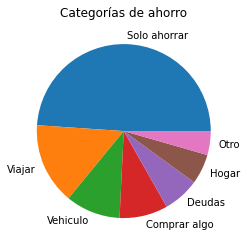

In [40]:
import matplotlib.pyplot as plt
plt.pie(projects_by_category_DF["total_projects"], labels=projects_by_category_DF["category"])
plt.title("Categorías de ahorro")
plt.show()

In [7]:
### Evidenciamos que la categoría que más está presente en los proyectos es "solo ahorrar",
### seguida por "viajar", "comprar vehículo", "algo más" respectivamente

### Total de proyectos por "tipo de regla"

In [8]:
query = """SELECT rule_type.name as rule_name, COUNT(project.project_category_id) as total_projects
FROM rule_type INNER JOIN rule on rule_type.id = rule.rule_type_id
INNER JOIN project on rule.project_id = project.project_id
GROUP BY rule_name
ORDER BY total_projects DESC"""
projects_by_rule_type_DF = pd.read_sql(query, engine)
projects_by_rule_type_DF

,rule_name,total_projects
0,Monto fijo,28487
1,% de mi sueldo,11807
2,Redondear,10511
3,Desafío 52 semanas,10321
4,Placer culpable,5591
5,Santander TAP,1486
6,Pasión Futbolera,51


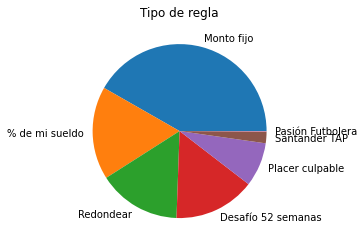

In [41]:
plt.pie(projects_by_rule_type_DF["total_projects"], labels=projects_by_rule_type_DF["rule_name"])
plt.title("Tipo de regla")
plt.show()

In [9]:
### La regla más usada(con gran diferencia) en los proyetos de ahorro es "Monto fijo",
### seguida por "% de mi sueldo", "Redondear" y "desafío de 52 semanas" respectivamente,
### estas 3 reglas están bastante parejas comparandolas entre sí

### Ahora se realizarán consultas cons las primeras cuatro categorías con los diferentes tipos de reglas que existen, para verificar como se comportan estas reglas en nuestras primeras categorías

In [10]:
# Solo ahorrar

In [11]:
query = """SELECT rule_type.name as rule_type_name, COUNT(project.project_id) as solo_ahorrar FROM rule_type INNER JOIN rule on rule_type.id = rule.rule_type_id
INNER JOIN project on rule.project_id = project.project_id
WHERE project.project_category_id = "4500593565e942d9876fa73734336157"
GROUP BY rule_type_name
ORDER BY solo_ahorrar DESC"""
solo_ahorrar_rt_DF = pd.read_sql(query, engine)

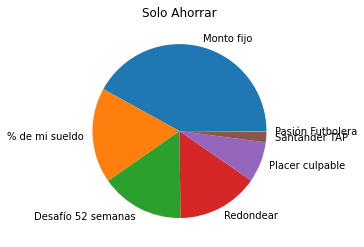

In [12]:
plt.pie(solo_ahorrar_rt_DF["solo_ahorrar"], labels=solo_ahorrar_rt_DF["rule_type_name"])
plt.title("Solo Ahorrar")
plt.show()

In [13]:
# Viajar

In [14]:
query = """SELECT rule_type.name as rule_type_name, COUNT(project.project_id) as viajar FROM rule_type INNER JOIN rule on rule_type.id = rule.rule_type_id
INNER JOIN project on rule.project_id = project.project_id
WHERE project.project_category_id = "c173854d8d994c5cad7926cedb6b8770"
GROUP BY rule_type_name
ORDER BY viajar DESC"""
viajar_rt_DF = pd.read_sql(query, engine)

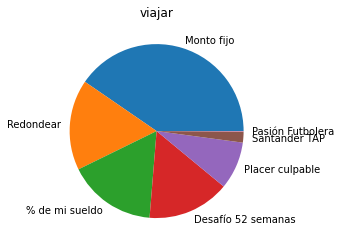

In [15]:
plt.pie(viajar_rt_DF["viajar"], labels=viajar_rt_DF["rule_type_name"])
plt.title("viajar")
plt.show()

In [16]:
# Vehículo

In [17]:
query = """SELECT rule_type.name as rule_type_name, COUNT(project.project_id) as vehiculo FROM rule_type INNER JOIN rule on rule_type.id = rule.rule_type_id
INNER JOIN project on rule.project_id = project.project_id
WHERE project.project_category_id = "015981e401af4887becbec5f45c3cd4c"
GROUP BY rule_type_name
ORDER BY vehiculo DESC"""
vehiculo_rt_DF = pd.read_sql(query, engine)

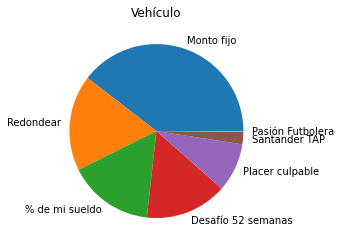

In [18]:
plt.pie(vehiculo_rt_DF["vehiculo"], labels=viajar_rt_DF["rule_type_name"])
plt.title("Vehículo")
plt.show()

In [19]:
# Comprar algo

In [20]:
query = """SELECT rule_type.name as rule_type_name, COUNT(project.project_id) as comprar_algo FROM rule_type INNER JOIN rule on rule_type.id = rule.rule_type_id
INNER JOIN project on rule.project_id = project.project_id
WHERE project.project_category_id = "b252b4300a02483eb15812ff9e03b841"
GROUP BY rule_type_name
ORDER BY comprar_algo DESC"""
comprar_algo_rt_DF = pd.read_sql(query, engine)

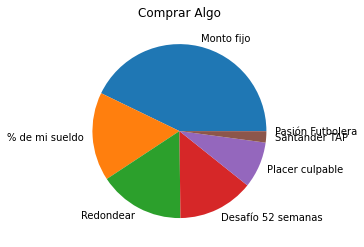

In [21]:
plt.pie(comprar_algo_rt_DF["comprar_algo"], labels=comprar_algo_rt_DF["rule_type_name"])
plt.title("Comprar Algo")
plt.show()

### A simple vista se evidencia el patrón hallado en la tendencia del total de las categorías, y es que la regla más predominante para ahorrar es "monto_fijo"

In [22]:
### Vamos a comparar todas las reglas entre sí

In [27]:
all_rules = solo_ahorrar_rt_DF.copy()
all_rules["viajar"] = viajar_rt_DF["viajar"]
all_rules["vehiculo"] = vehiculo_rt_DF["vehiculo"]
all_rules["comprar_algo"] = comprar_algo_rt_DF["comprar_algo"]
all_rules

,rule_type_name,solo_ahorrar,viajar,vehiculo,comprar_algo
0,Monto fijo,13825,4431,2550,2722
1,% de mi sueldo,5836,1846,1149,1046
2,Desafío 52 semanas,5095,1804,1024,1011
3,Redondear,5002,1678,985,895
4,Placer culpable,2487,972,584,547
5,Santander TAP,656,225,149,134
6,Pasión Futbolera,28,8,8,1


<AxesSubplot:xlabel='rule_type_name'>

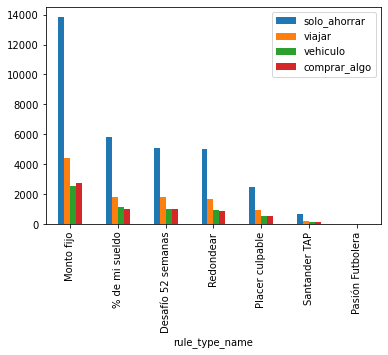

In [31]:
%matplotlib inline
all_rules.plot(kind="bar",x="rule_type_name")